In [1]:
# 나눔글꼴 설치
!apt install fonts-nanum

# Plotnine 패키지 설치
!pip install plotnine

# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

# 레티나 디스플레이 지원
%config InlineBackend.figure_format = 'retina'

No Java runtime present, requesting install.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


AttributeError: module 'matplotlib' has no attribute 'font_manager'

In [38]:
import pandas as pd
import numpy as np
from plotnine import *
import folium

src = pd.read_csv('/Users/heebunny/Downloads/blog_raw.csv')

In [39]:
df = src.copy()
df.head()

,방송,식당명,방송일,포스팅날짜,제목,내용
0,수요미식회,나노하나,20170322.0,2017. 3. 22. 22:10\r\t,3월일상:: #3 - 화이트데이/연남동 나노하나/한남동 잭슨피자/ 연하식당,"#.1화이트데이 전날, 퇴근하면서 오빠가 사온 #메종엠오 마들렌내가 정말너무 좋아하..."
1,수요미식회,나노하나,20170322.0,2017. 3. 22. 12:11\r\t,"수요미식회 연남동 나노하나 - 모츠나베(대창전골), 옥돔구이, 모듬튀김",특색있는 메뉴로 여자손님들을사로잡은 수요미식회 연남동 특집에소개될 맛집 나노하나일본...
2,수요미식회,나노하나,20170322.0,2017. 3. 22. 12:00,수요미식회 연남동 - 나노하나 :모츠나베는 사랑이야,﻿[ 수요미식회 연남동 나노하나 : 모츠나베 &amp; 모듬튀김 ]﻿안녕하세요 티이...
3,수요미식회,나노하나,20170322.0,2017. 3. 22. 19:21\r\t,수요미식회 맛집#수요미식회대창전골 맛집#나노하나#연남동맛집#모츠나베,#수요미식회맛집#수요미식회연남동특집#모츠나베#연남동맛집#연남동일식주점#연트럴파크맛집...
4,수요미식회,나노하나,20170322.0,2017. 4. 2. 0:25\r\t,"연남동 나노하나, 바닐라키친",본문 기타 기능본문 폰트 크기 작게 보기본문 폰트 크기 크게 보기가 매주 금요일은 ...


In [45]:
df.shape

(1000, 6)

In [74]:
#NA행 날리기
df.dropna()
dftidy = df.dropna()
dftidy.shape

(192, 6)

In [76]:
#'도쿄바나나 나노하나 에디션', '오버워치 나노하나' 포스팅 제외하기

expt = dftidy.loc[dftidy['내용'].str.contains('바나나|오버워치') == False]
expt.head()

# dftidy = dftidy.drop(expt)

,방송,식당명,방송일,포스팅날짜,제목,내용
0,수요미식회,나노하나,20170322.0,2017. 3. 22. 22:10\r\t,3월일상:: #3 - 화이트데이/연남동 나노하나/한남동 잭슨피자/ 연하식당,"#.1화이트데이 전날, 퇴근하면서 오빠가 사온 #메종엠오 마들렌내가 정말너무 좋아하..."
1,수요미식회,나노하나,20170322.0,2017. 3. 22. 12:11\r\t,"수요미식회 연남동 나노하나 - 모츠나베(대창전골), 옥돔구이, 모듬튀김",특색있는 메뉴로 여자손님들을사로잡은 수요미식회 연남동 특집에소개될 맛집 나노하나일본...
2,수요미식회,나노하나,20170322.0,2017. 3. 22. 12:00,수요미식회 연남동 - 나노하나 :모츠나베는 사랑이야,﻿[ 수요미식회 연남동 나노하나 : 모츠나베 &amp; 모듬튀김 ]﻿안녕하세요 티이...
3,수요미식회,나노하나,20170322.0,2017. 3. 22. 19:21\r\t,수요미식회 맛집#수요미식회대창전골 맛집#나노하나#연남동맛집#모츠나베,#수요미식회맛집#수요미식회연남동특집#모츠나베#연남동맛집#연남동일식주점#연트럴파크맛집...
4,수요미식회,나노하나,20170322.0,2017. 4. 2. 0:25\r\t,"연남동 나노하나, 바닐라키친",본문 기타 기능본문 폰트 크기 작게 보기본문 폰트 크기 크게 보기가 매주 금요일은 ...


In [77]:
expt.shape

(184, 6)

/anaconda3/lib/python3.6/site-packages/plotnine/utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
/anaconda3/lib/python3.6/site-packages/plotnine/positions/position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


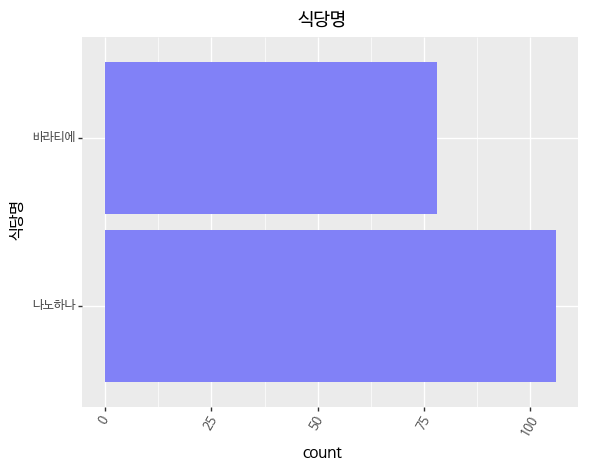

<ggplot: (7527062150)>

In [78]:
#남은 데이터에서 식당별 갯수 그래프 그려보기

(ggplot(expt)
 + aes('식당명')
 + geom_bar(fill='#8181F7')
 + ggtitle('식당명')
 + coord_flip()
 + theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=60))
)

In [83]:
#데이터 저장하기

expt.to_csv('/Users/heebunny/Downloads/blog_tidydata.csv')